## Importing libraries

In [3]:
#Preprocesing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.offline as py
from collections import Counter

#Classification Algorithum
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Evaluate Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Loading Model

In [7]:
df=pd.read_csv("Breast-Cancer-Dataset.csv")
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### df.shape

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [10]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Checking Gaussian Distribution using Q-Q plot and Normalizing using square root transformation

In [11]:
def plot_data(df,feature):
    print("*****************",feature,"*****************")
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
def transformation(feature):
    #Squre root transformation
    df[feature]=df[feature]**(1/2)
    

Gaussian Distributed using Q-Q plot.
***************** radius_mean *****************


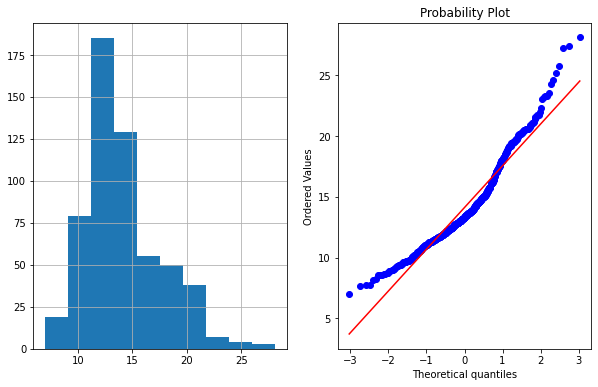

After Squre root Transormation
***************** radius_mean *****************


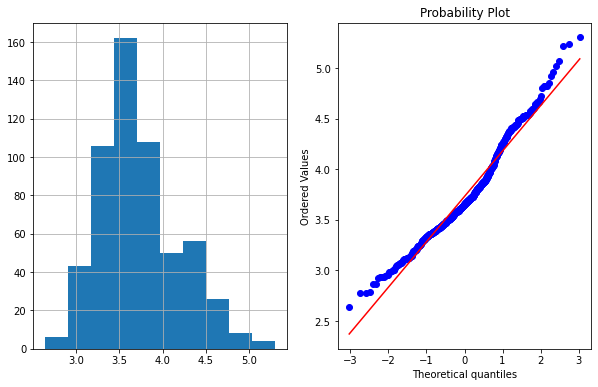

***************** texture_mean *****************


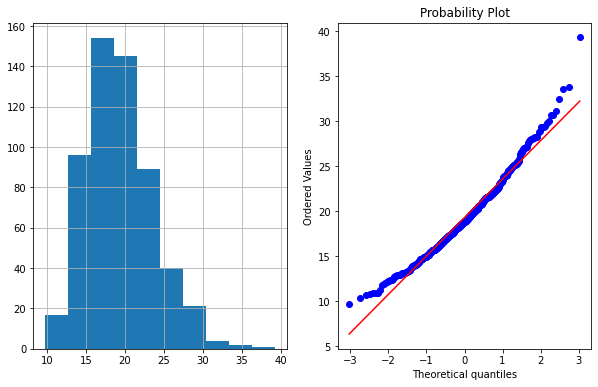

After Squre root Transormation
***************** texture_mean *****************


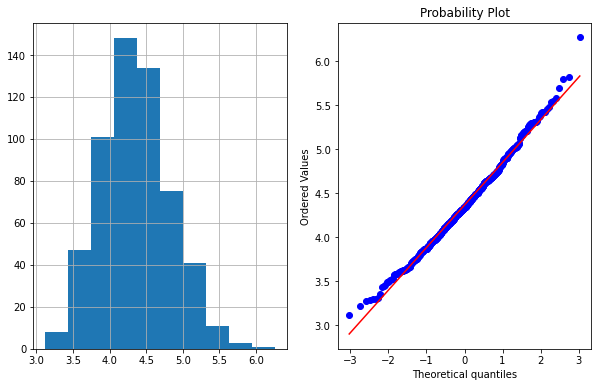

***************** perimeter_mean *****************


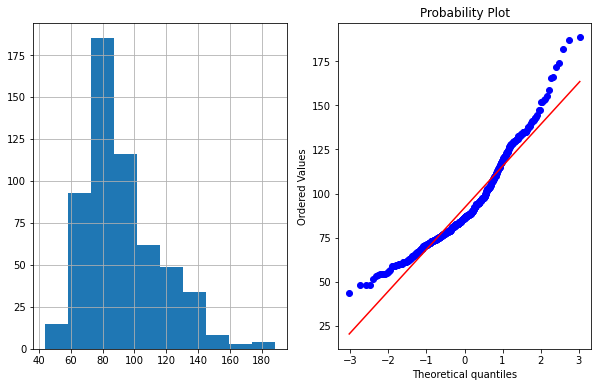

After Squre root Transormation
***************** perimeter_mean *****************


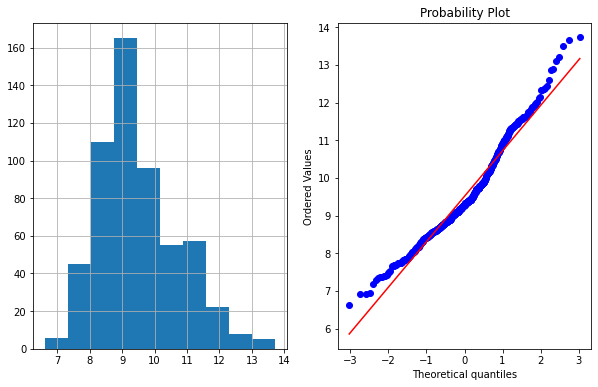

***************** area_mean *****************


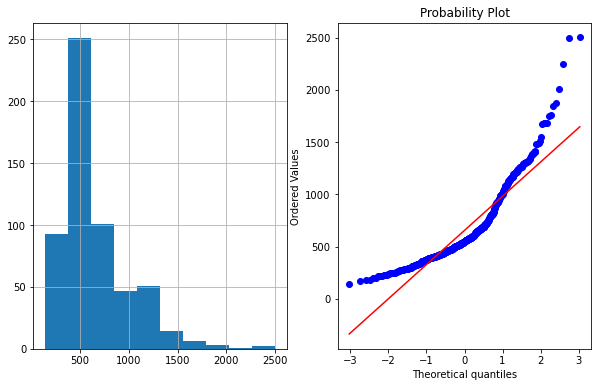

After Squre root Transormation
***************** area_mean *****************


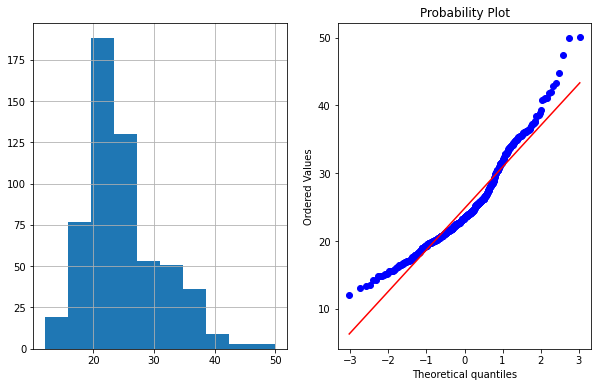

***************** smoothness_mean *****************


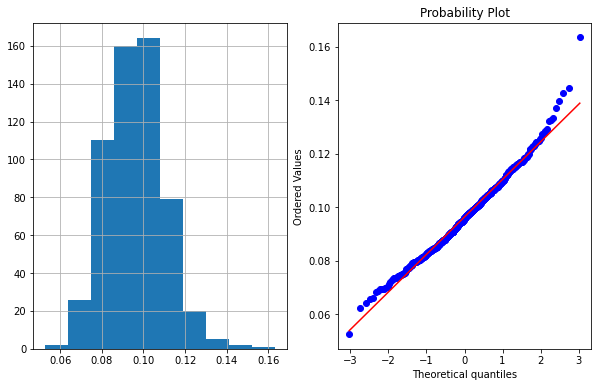

After Squre root Transormation
***************** smoothness_mean *****************


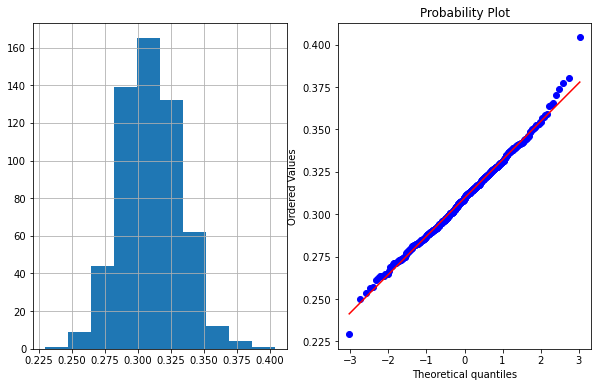

***************** compactness_mean *****************


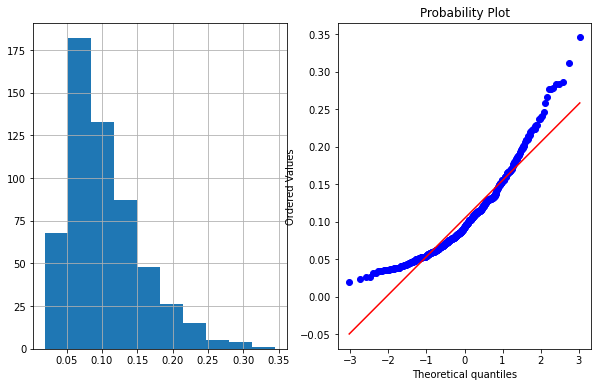

After Squre root Transormation
***************** compactness_mean *****************


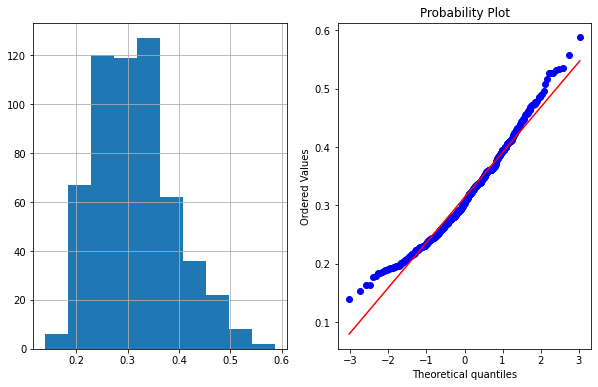

***************** concavity_mean *****************


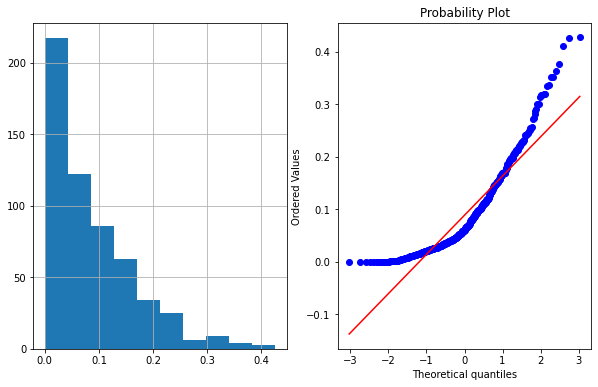

After Squre root Transormation
***************** concavity_mean *****************


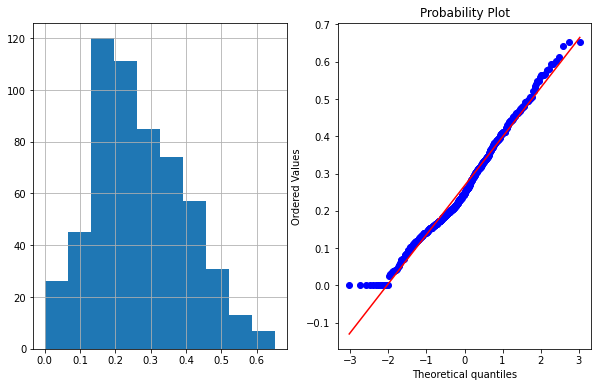

***************** concave points_mean *****************


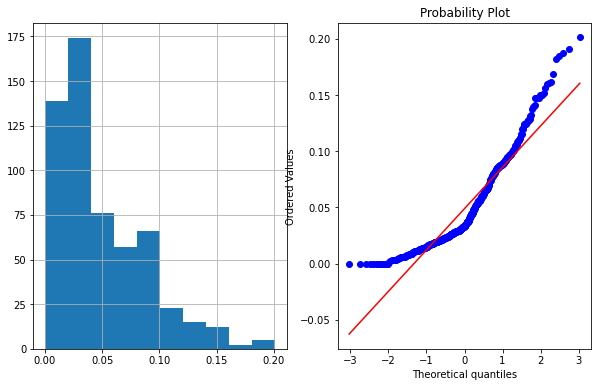

After Squre root Transormation
***************** concave points_mean *****************


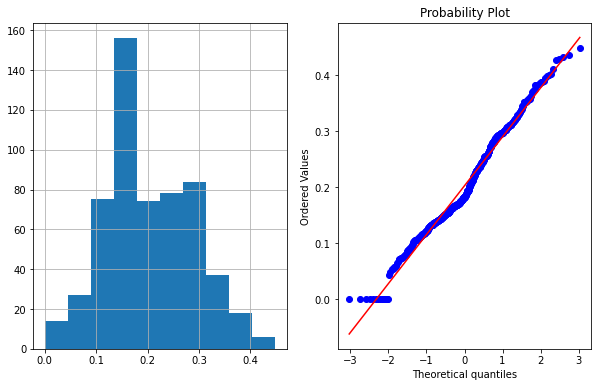

***************** symmetry_mean *****************


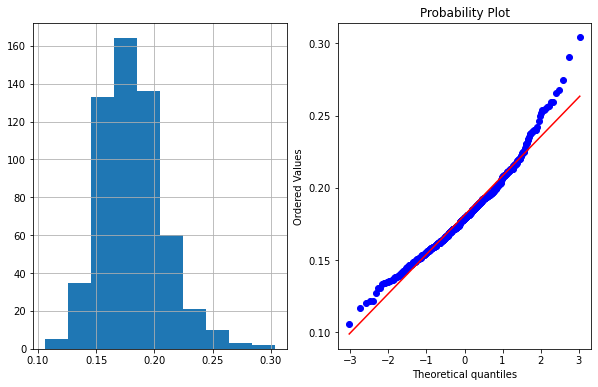

After Squre root Transormation
***************** symmetry_mean *****************


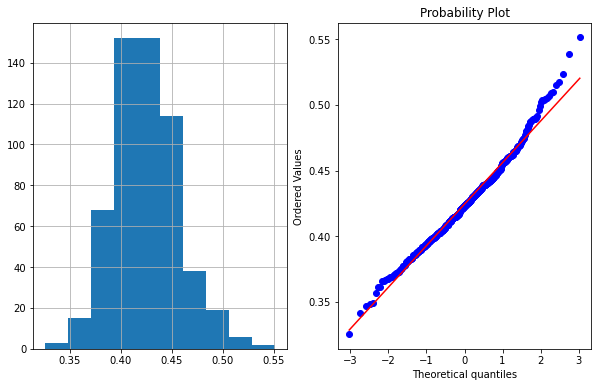

***************** fractal_dimension_mean *****************


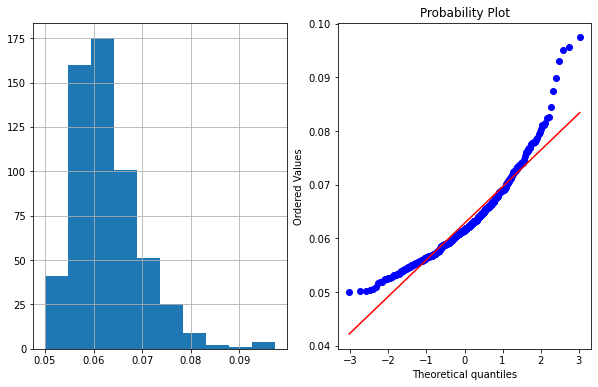

After Squre root Transormation
***************** fractal_dimension_mean *****************


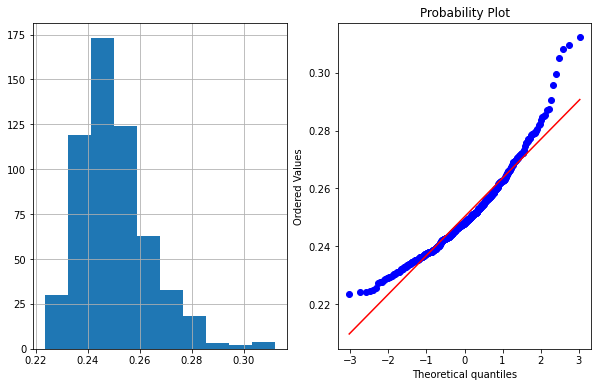

***************** radius_se *****************


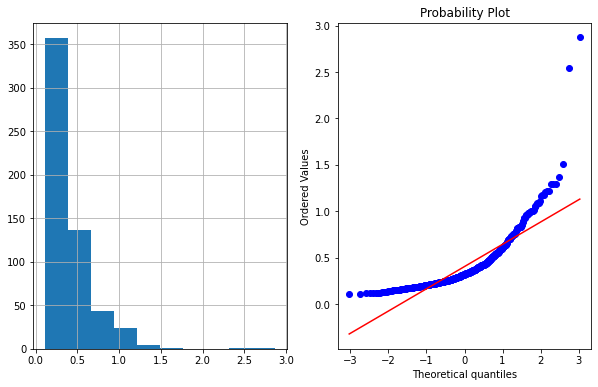

After Squre root Transormation
***************** radius_se *****************


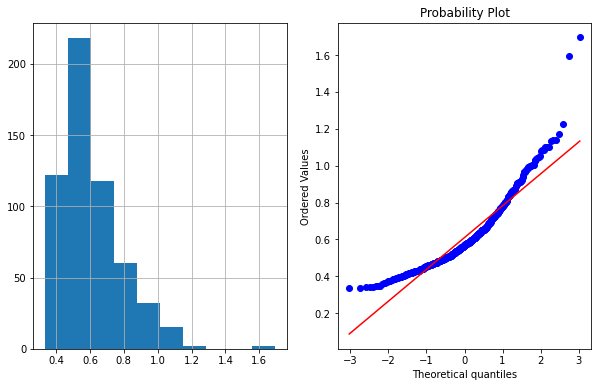

***************** texture_se *****************


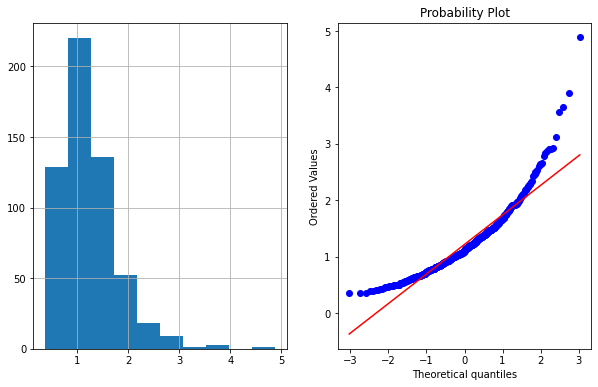

After Squre root Transormation
***************** texture_se *****************


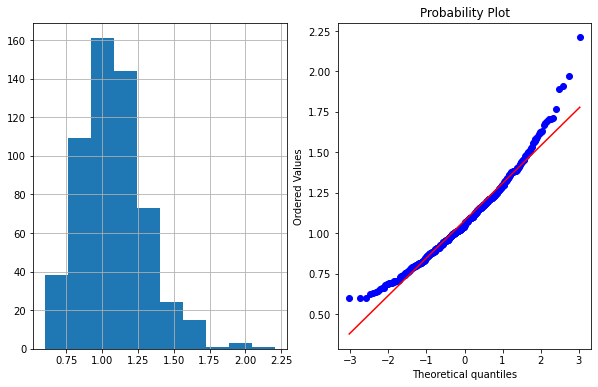

***************** perimeter_se *****************


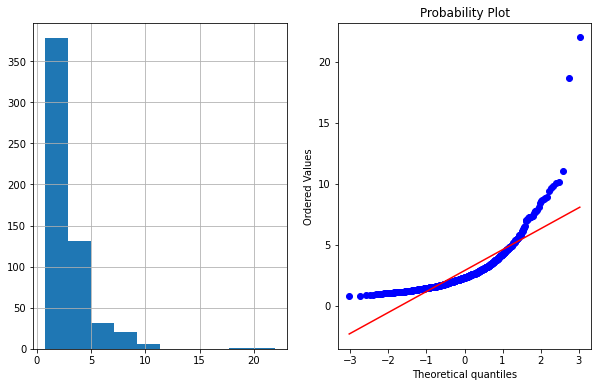

After Squre root Transormation
***************** perimeter_se *****************


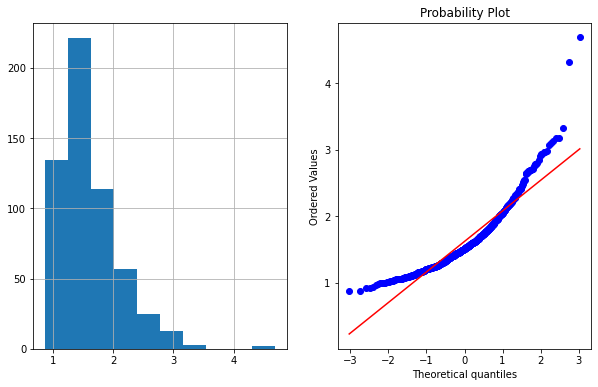

***************** area_se *****************


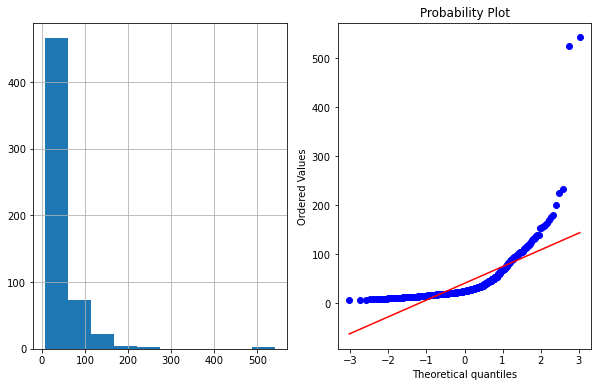

After Squre root Transormation
***************** area_se *****************


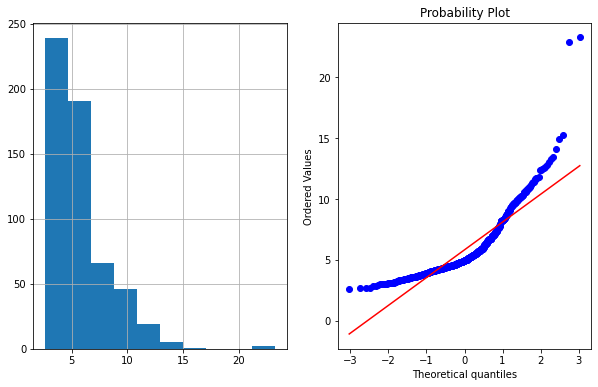

***************** smoothness_se *****************


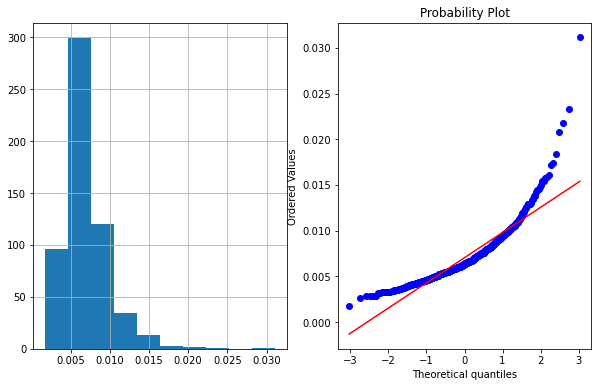

After Squre root Transormation
***************** smoothness_se *****************


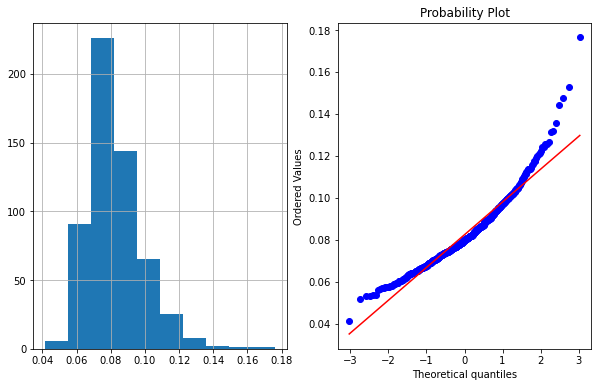

***************** compactness_se *****************


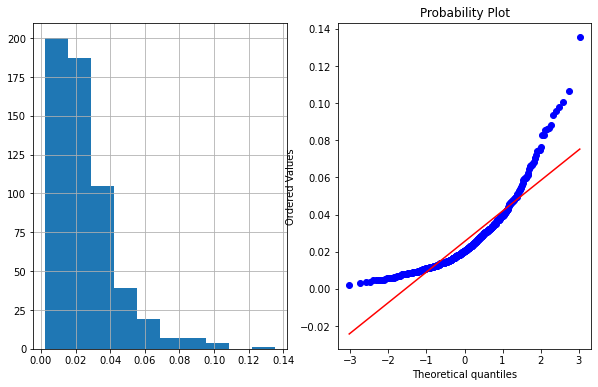

After Squre root Transormation
***************** compactness_se *****************


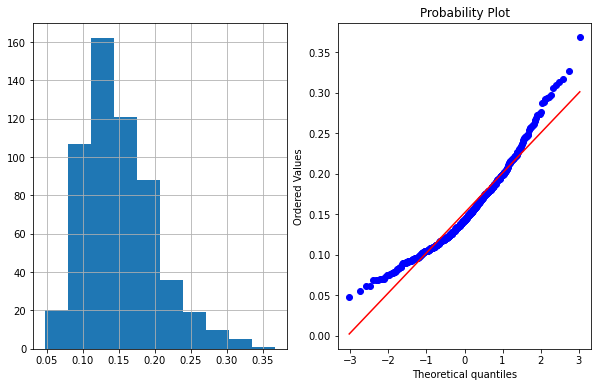

***************** concavity_se *****************


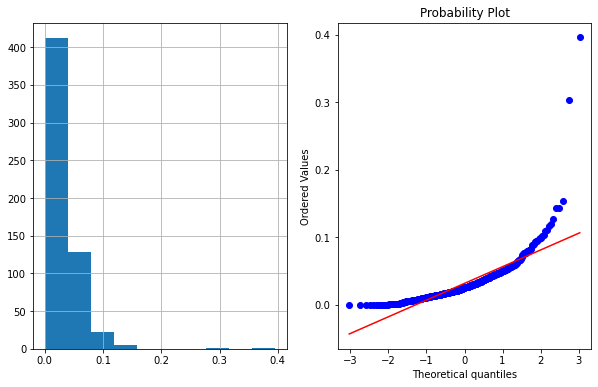

After Squre root Transormation
***************** concavity_se *****************


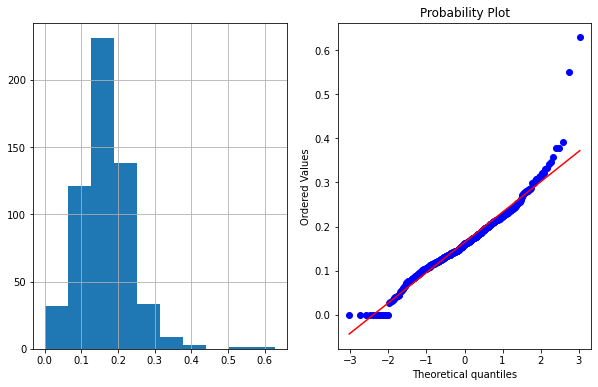

***************** concave points_se *****************


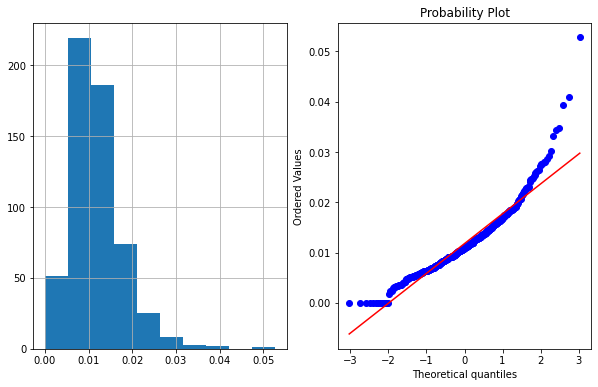

After Squre root Transormation
***************** concave points_se *****************


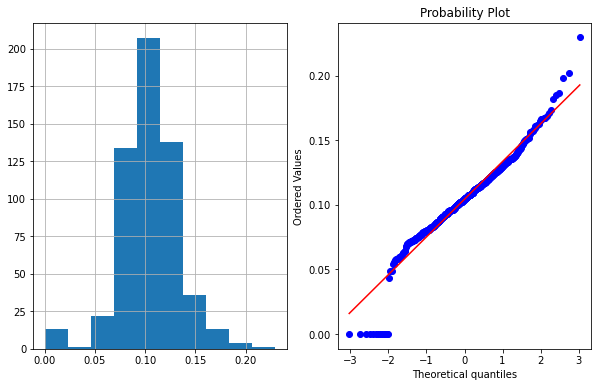

***************** symmetry_se *****************


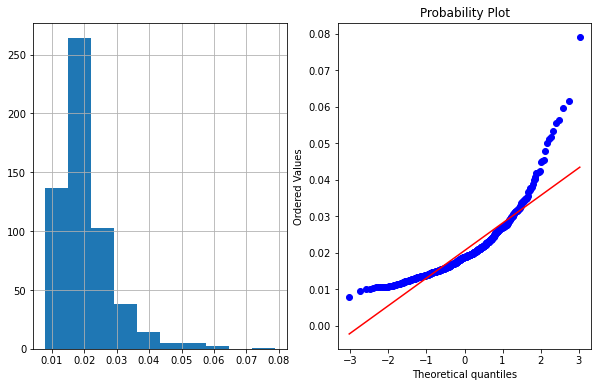

After Squre root Transormation
***************** symmetry_se *****************


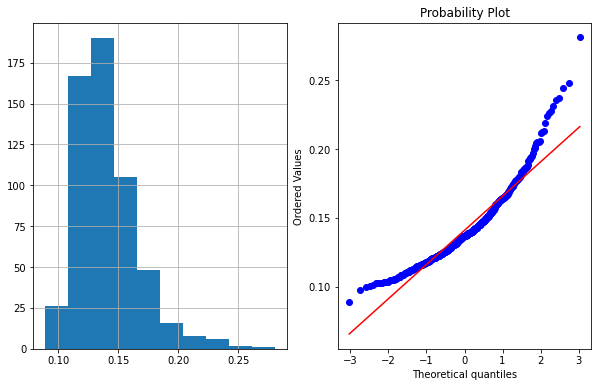

***************** fractal_dimension_se *****************


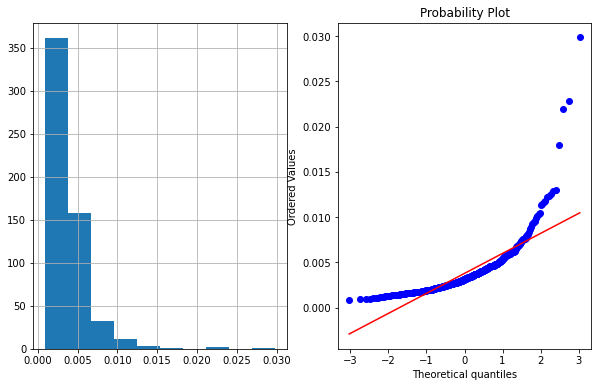

After Squre root Transormation
***************** fractal_dimension_se *****************


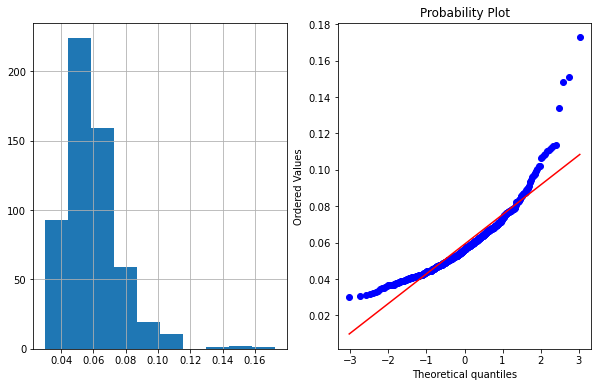

***************** radius_worst *****************


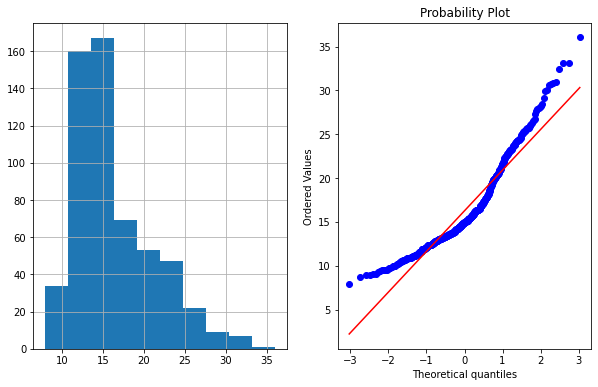

After Squre root Transormation
***************** radius_worst *****************


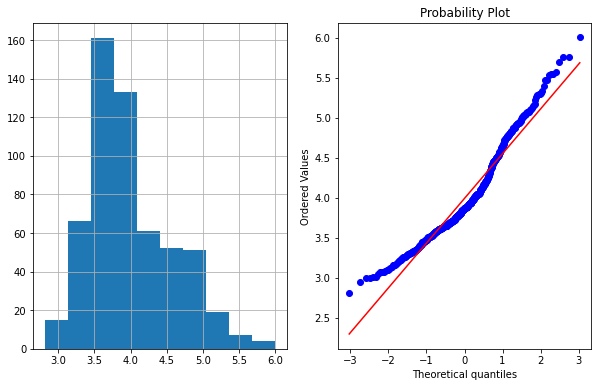

***************** texture_worst *****************


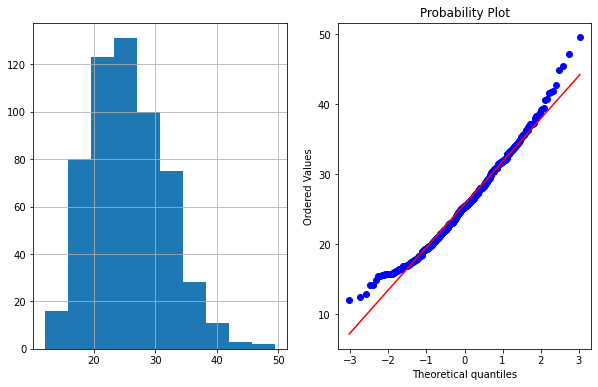

After Squre root Transormation
***************** texture_worst *****************


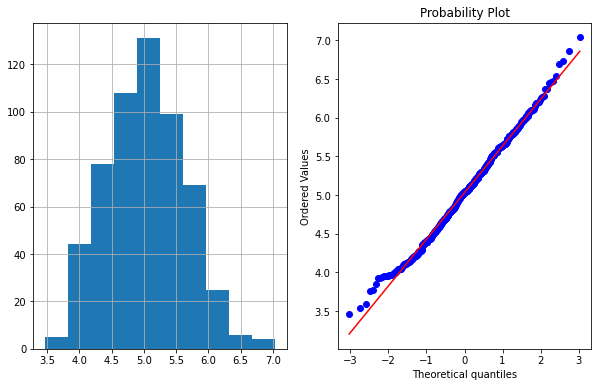

***************** perimeter_worst *****************


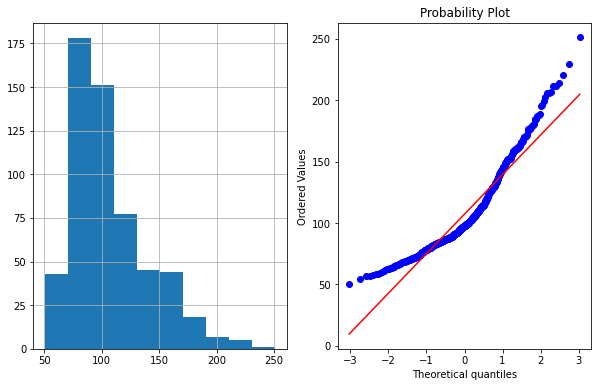

After Squre root Transormation
***************** perimeter_worst *****************


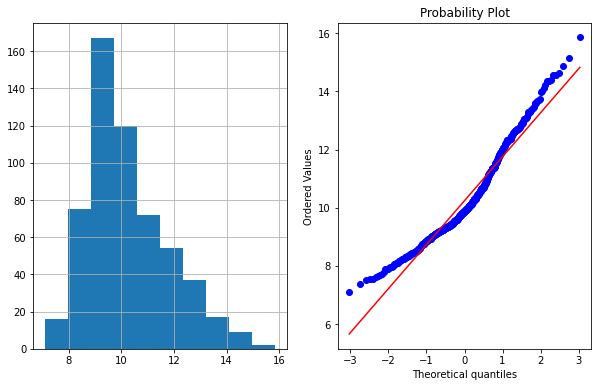

***************** area_worst *****************


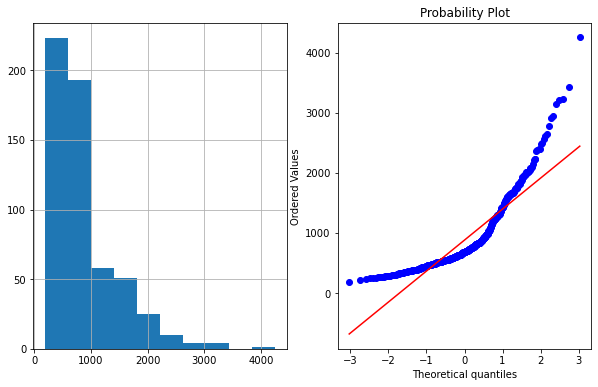

After Squre root Transormation
***************** area_worst *****************


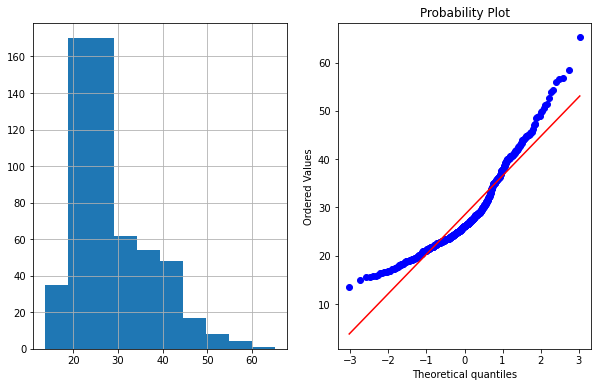

***************** smoothness_worst *****************


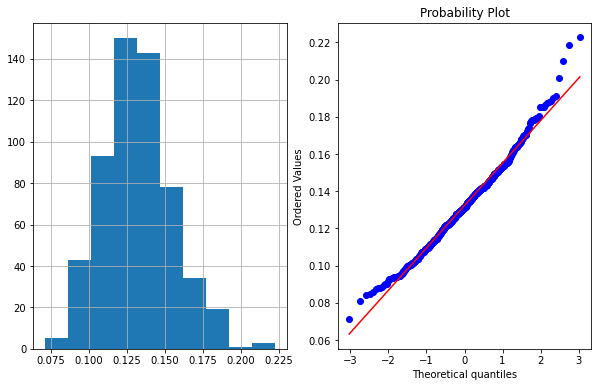

After Squre root Transormation
***************** smoothness_worst *****************


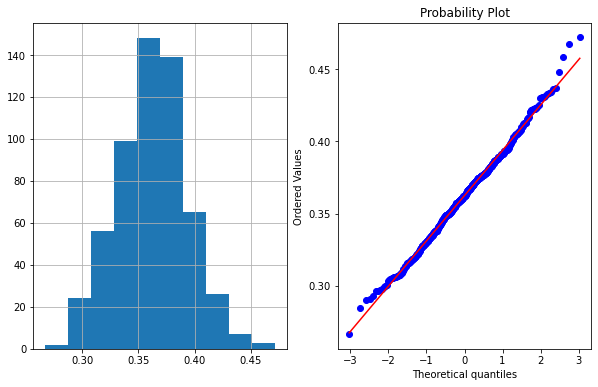

***************** compactness_worst *****************


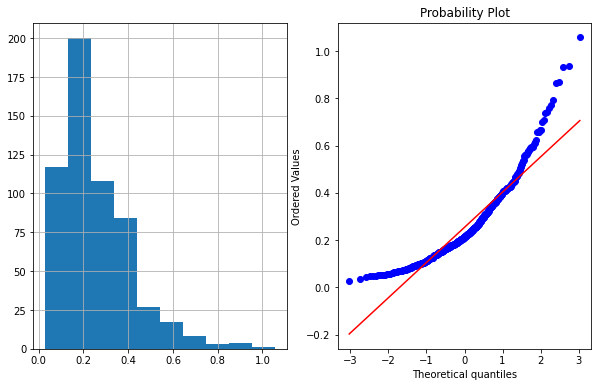

After Squre root Transormation
***************** compactness_worst *****************


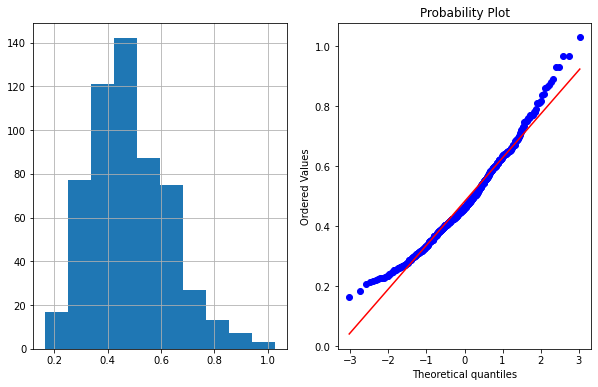

***************** concavity_worst *****************


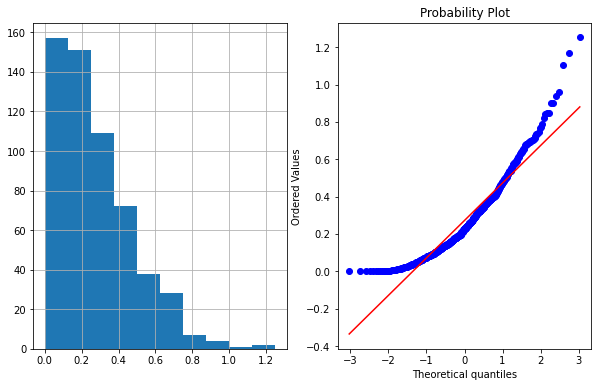

After Squre root Transormation
***************** concavity_worst *****************


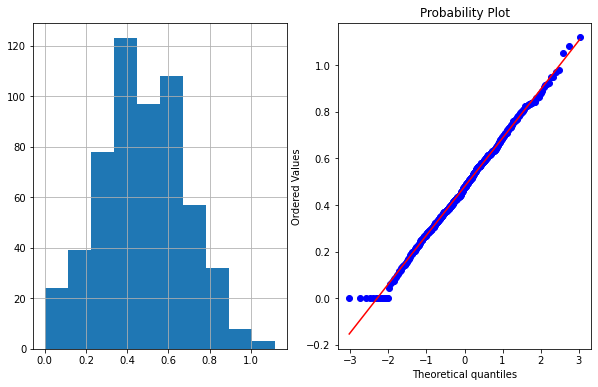

***************** concave points_worst *****************


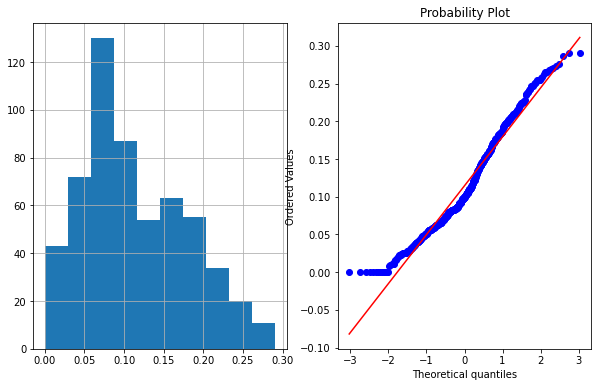

After Squre root Transormation
***************** concave points_worst *****************


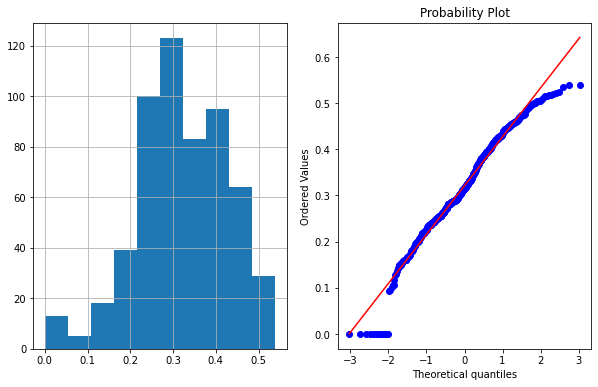

***************** symmetry_worst *****************


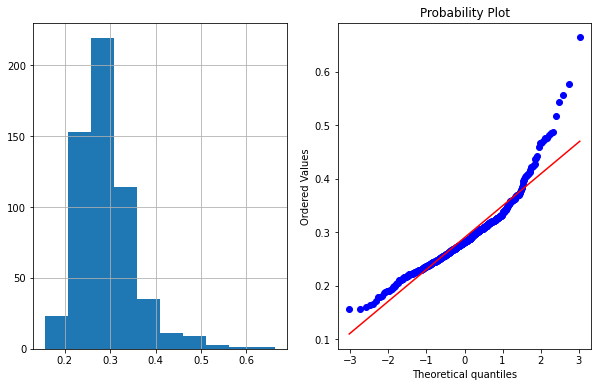

After Squre root Transormation
***************** symmetry_worst *****************


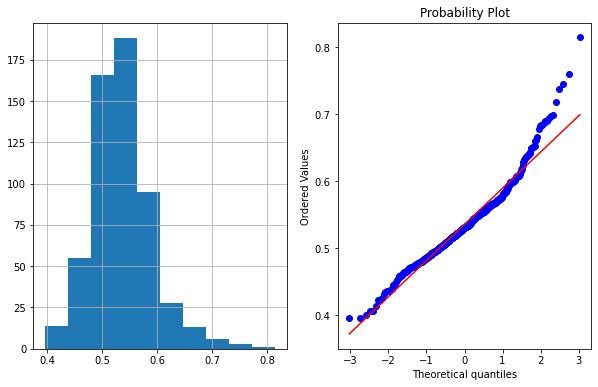

***************** fractal_dimension_worst *****************


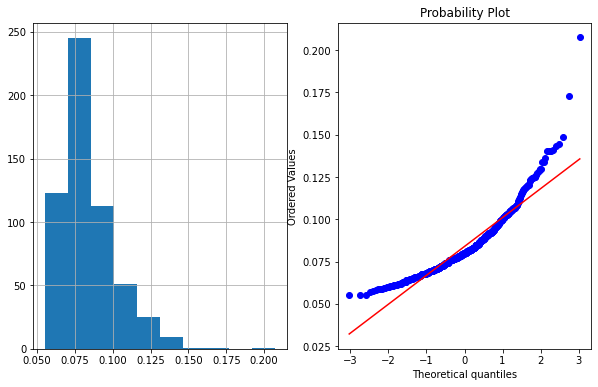

After Squre root Transormation
***************** fractal_dimension_worst *****************


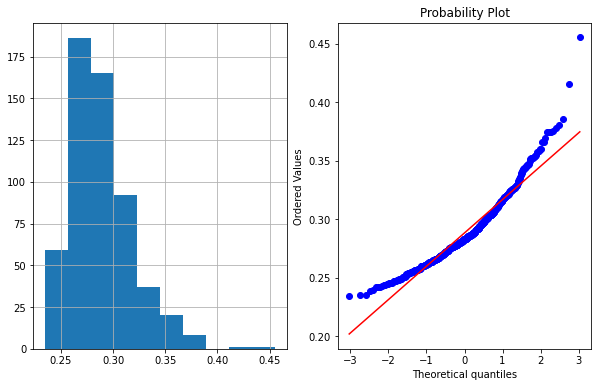

In [12]:
print("Gaussian Distributed using Q-Q plot.")
for i in df.columns:
    if i not in ['diagnosis']:
        plot_data(df,i)
        print("After Squre root Transormation")
        df[i]=df[i]**(1/2)
        plot_data(df,i)

In [13]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]
    trace=go.Pie(labels=labels,values=values)
    py.iplot([trace])

In [14]:
PlotPie(df, 'diagnosis')
sns.countplot(x='diagnosis',data=df,linewidth=2,edgecolor=sns.color_palette("dark", 1))
count=Counter(df['diagnosis'])
print("Malignant or M:",count['M'])
print("Benign or B:",count['B'])

NameError: name 'go' is not defined

## Decting Outliers

In [15]:
def plot_outliers(df,feature):
    print("***********************",feature,"************************")
    plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[feature],orient="h")
    plt.show()

*********************** radius_mean ************************


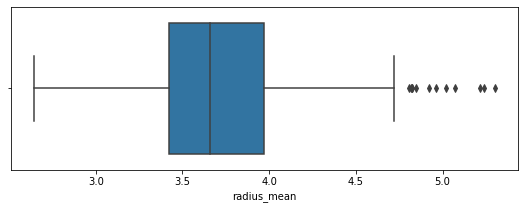

*********************** texture_mean ************************


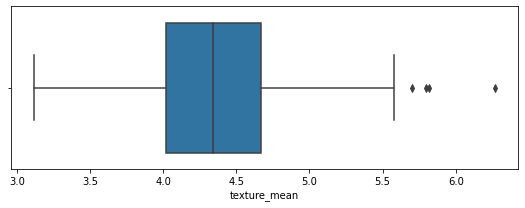

*********************** perimeter_mean ************************


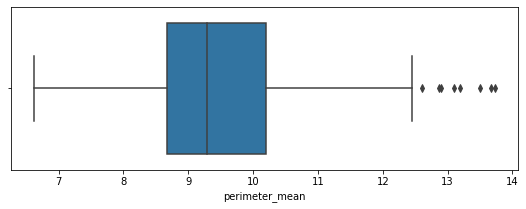

*********************** area_mean ************************


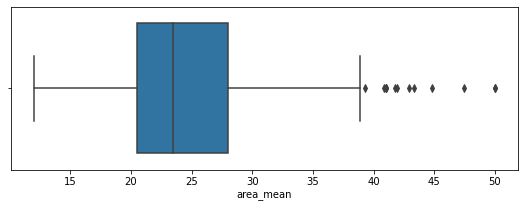

*********************** smoothness_mean ************************


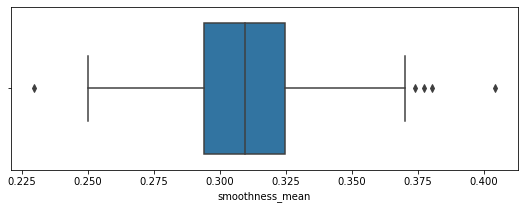

*********************** compactness_mean ************************


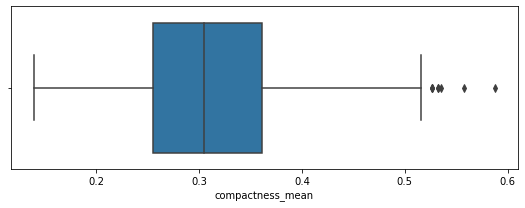

*********************** concavity_mean ************************


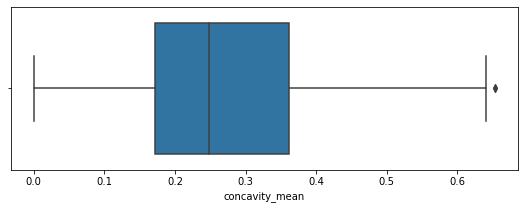

*********************** concave points_mean ************************


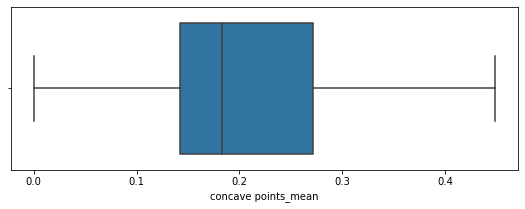

*********************** symmetry_mean ************************


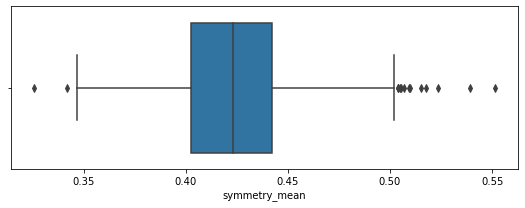

*********************** fractal_dimension_mean ************************


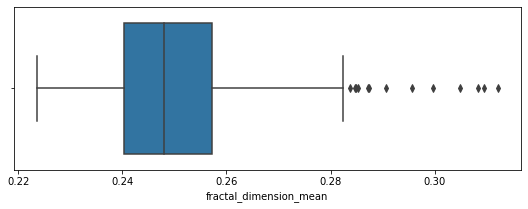

*********************** radius_se ************************


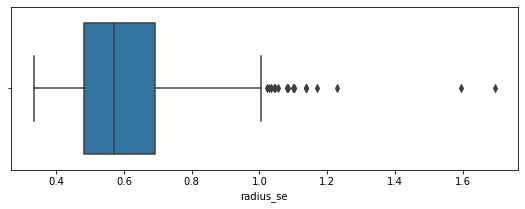

*********************** texture_se ************************


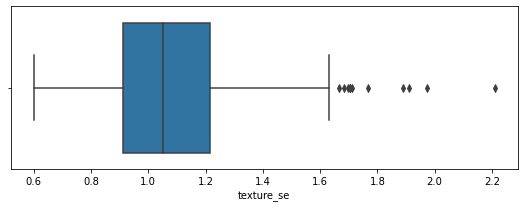

*********************** perimeter_se ************************


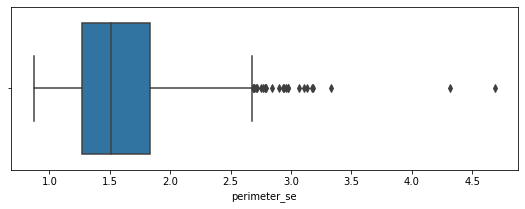

*********************** area_se ************************


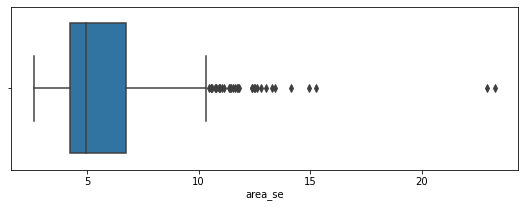

*********************** smoothness_se ************************


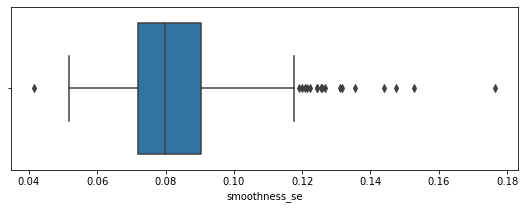

*********************** compactness_se ************************


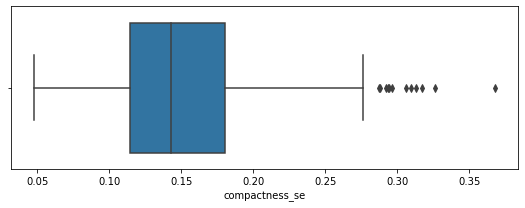

*********************** concavity_se ************************


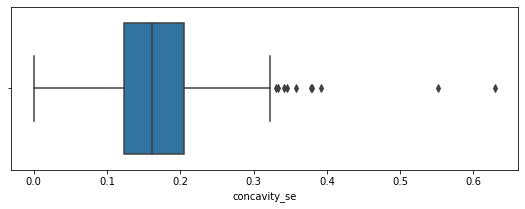

*********************** concave points_se ************************


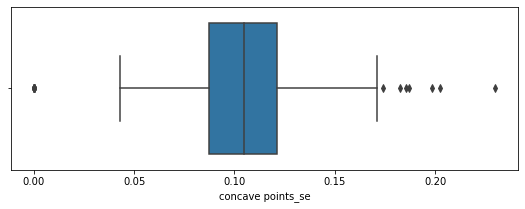

*********************** symmetry_se ************************


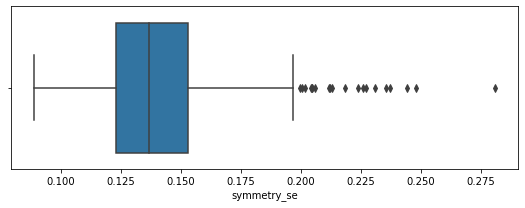

*********************** fractal_dimension_se ************************


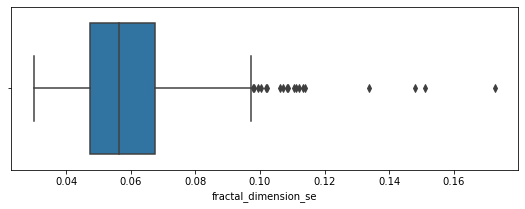

*********************** radius_worst ************************


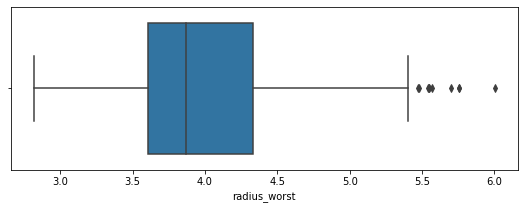

*********************** texture_worst ************************


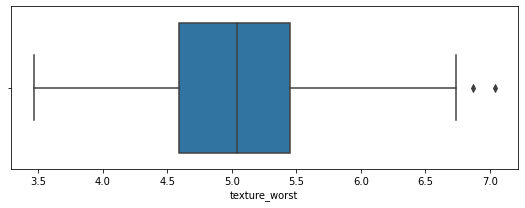

*********************** perimeter_worst ************************


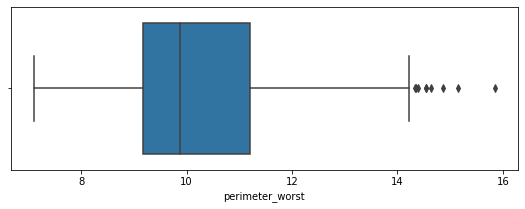

*********************** area_worst ************************


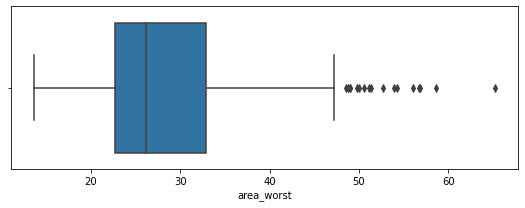

*********************** smoothness_worst ************************


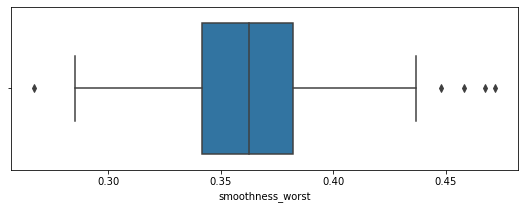

*********************** compactness_worst ************************


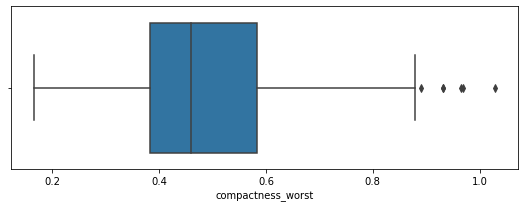

*********************** concavity_worst ************************


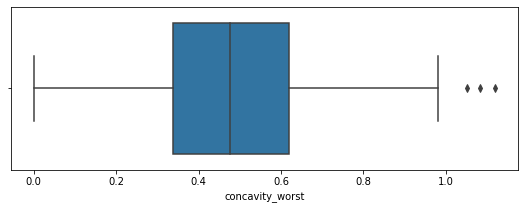

*********************** concave points_worst ************************


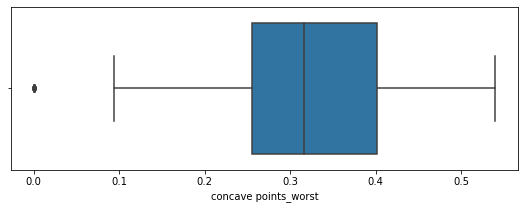

*********************** symmetry_worst ************************


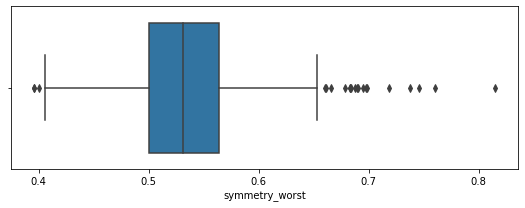

*********************** fractal_dimension_worst ************************


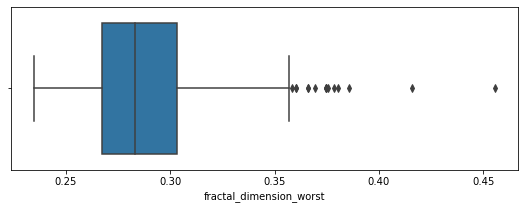

In [16]:
for i in range(1,len(df.columns)):
    plot_outliers(df,df.columns[i])

### Removing outliers using IQR technique

In [17]:
def remove_outlier(low = 25, high = 75):
    numerical_features = [i for i in df.columns if df[i].dtype != "O"]
    df1 = df.copy()
    for i in numerical_features:
        if len(df1[i].unique()) > 10:
            q1, q3 = np.percentile(df[i], [low,high]) #First quartile and third quartile
            iqr = q3-q1 #Interquartile range
            lower_bound, upper_bound  = q1-1.5*iqr, q3+1.5*iqr
            df1 = df1.loc[(df1[i] > lower_bound) & (df1[i] < upper_bound)]
    return df1

*********************** radius_mean ************************


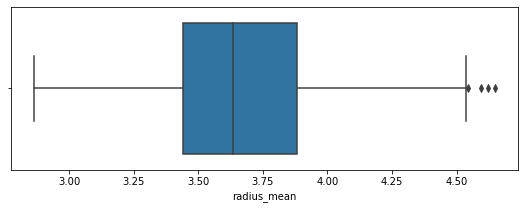

*********************** texture_mean ************************


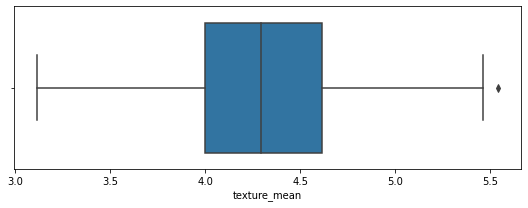

*********************** perimeter_mean ************************


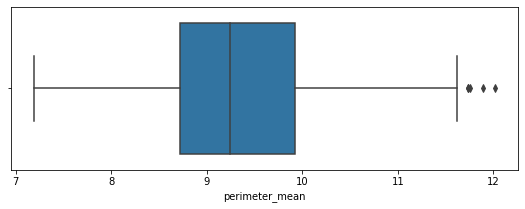

*********************** area_mean ************************


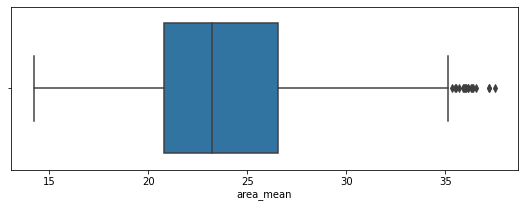

*********************** smoothness_mean ************************


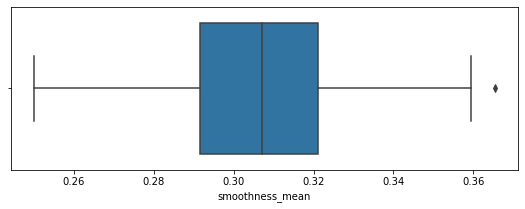

*********************** compactness_mean ************************


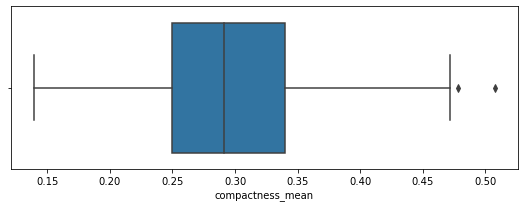

*********************** concavity_mean ************************


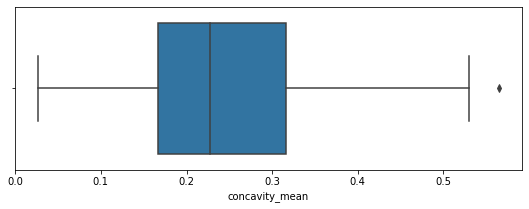

*********************** concave points_mean ************************


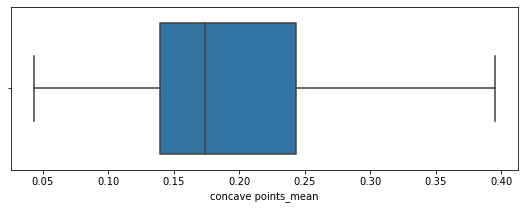

*********************** symmetry_mean ************************


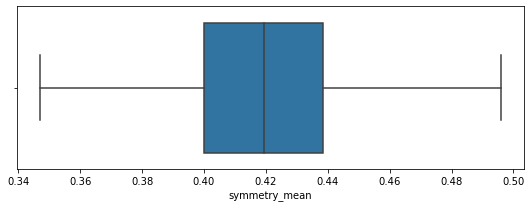

*********************** fractal_dimension_mean ************************


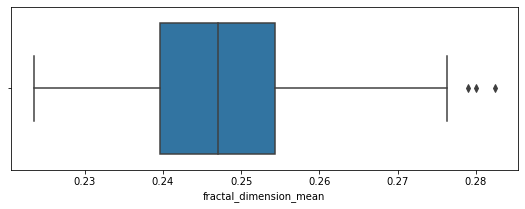

*********************** radius_se ************************


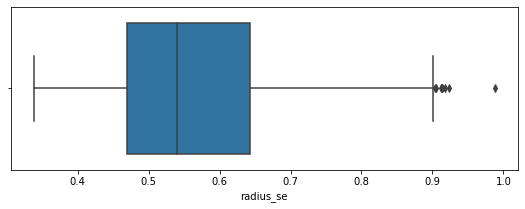

*********************** texture_se ************************


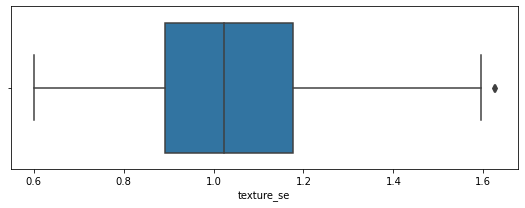

*********************** perimeter_se ************************


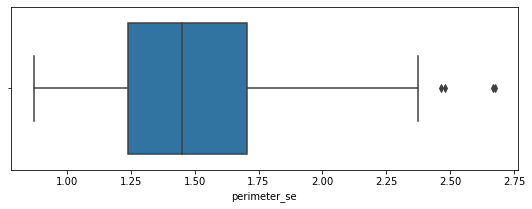

*********************** area_se ************************


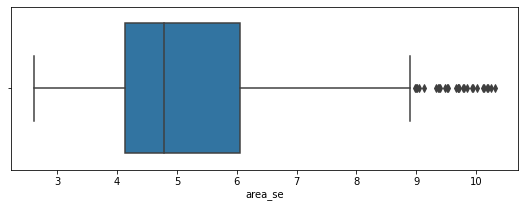

*********************** smoothness_se ************************


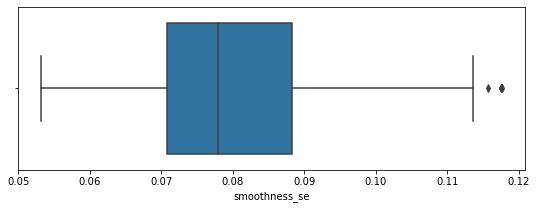

*********************** compactness_se ************************


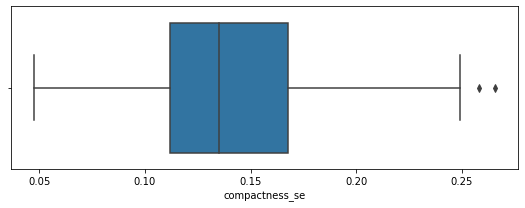

*********************** concavity_se ************************


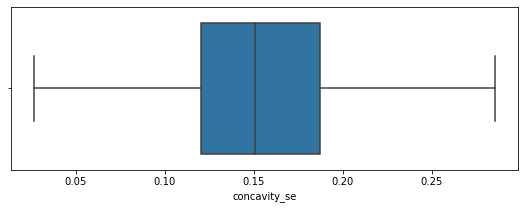

*********************** concave points_se ************************


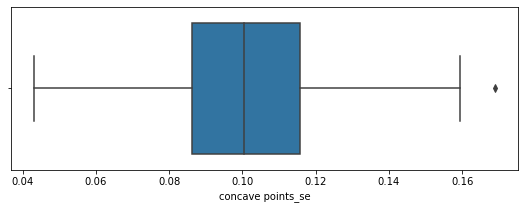

*********************** symmetry_se ************************


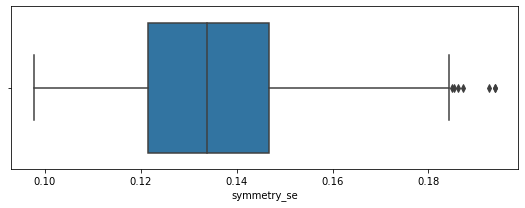

*********************** fractal_dimension_se ************************


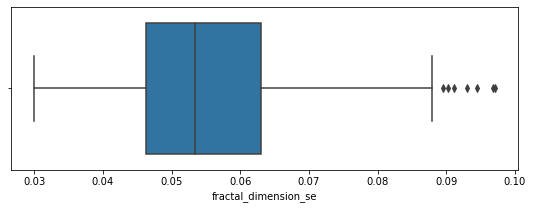

*********************** radius_worst ************************


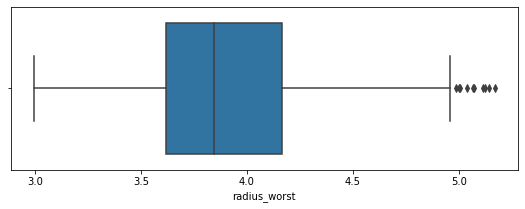

*********************** texture_worst ************************


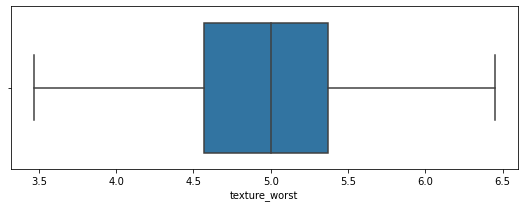

*********************** perimeter_worst ************************


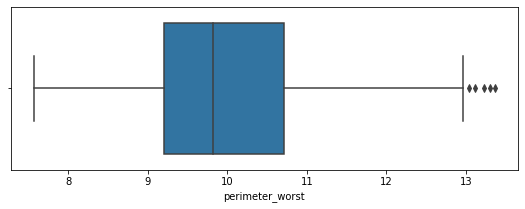

*********************** area_worst ************************


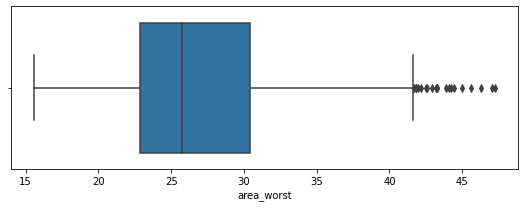

*********************** smoothness_worst ************************


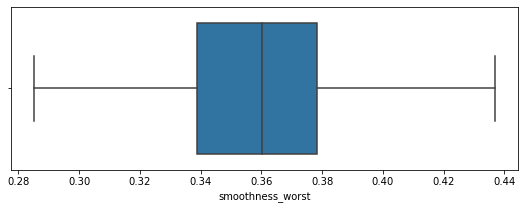

*********************** compactness_worst ************************


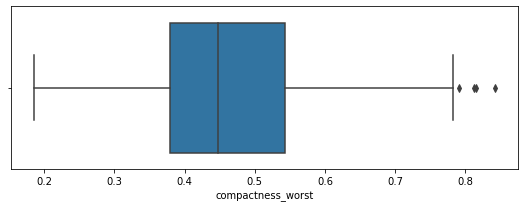

*********************** concavity_worst ************************


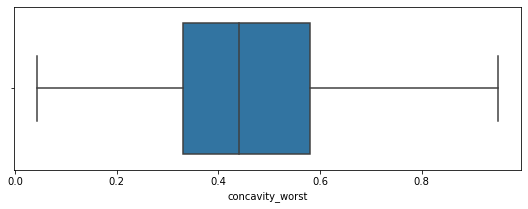

*********************** concave points_worst ************************


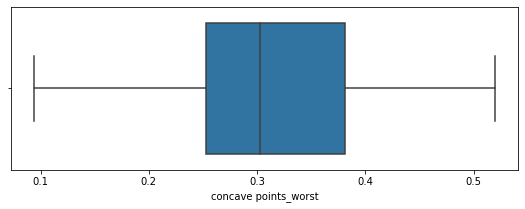

*********************** symmetry_worst ************************


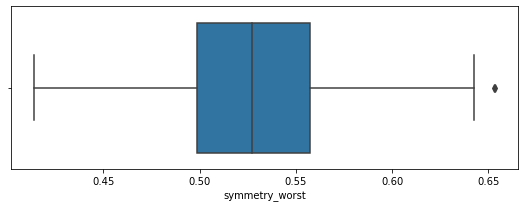

*********************** fractal_dimension_worst ************************


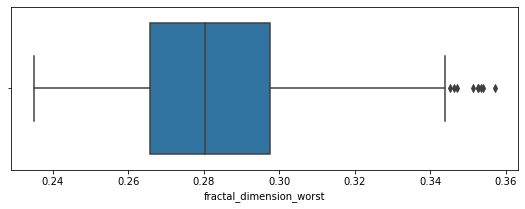

In [18]:
df=remove_outlier()
for i in range(1,len(df.columns)):
    plot_outliers(df,df.columns[i])

In [19]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
556,B,3.187475,4.426059,8.045496,17.655028,0.316702,0.273934,0.070887,0.105641,0.423202,...,3.263434,4.783304,8.238932,18.635987,0.355668,0.346410,0.100250,0.149399,0.475605,0.259654
558,B,3.819686,4.762352,9.817841,25.633962,0.291084,0.364692,0.320780,0.193287,0.381314,...,3.934463,5.222069,10.290773,27.083205,0.320312,0.563116,0.605145,0.332415,0.475184,0.282913
560,B,3.748333,5.210566,9.559289,24.503061,0.315103,0.335559,0.211234,0.207461,0.392046,...,3.911521,5.759340,10.009995,26.583830,0.352278,0.475815,0.364143,0.323728,0.474342,0.288461
565,M,4.486647,5.315073,11.454257,35.510562,0.312730,0.321559,0.379473,0.312906,0.418569,...,4.867237,6.184658,12.449900,41.605288,0.341467,0.438406,0.567010,0.403485,0.507149,0.257624
566,M,4.074310,5.299057,10.406729,29.293344,0.290775,0.319844,0.304155,0.230261,0.398748,...,4.356604,5.841233,11.256109,33.526109,0.337491,0.556237,0.583352,0.376563,0.470956,0.279643


In [21]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

## Finding important features

<AxesSubplot:>

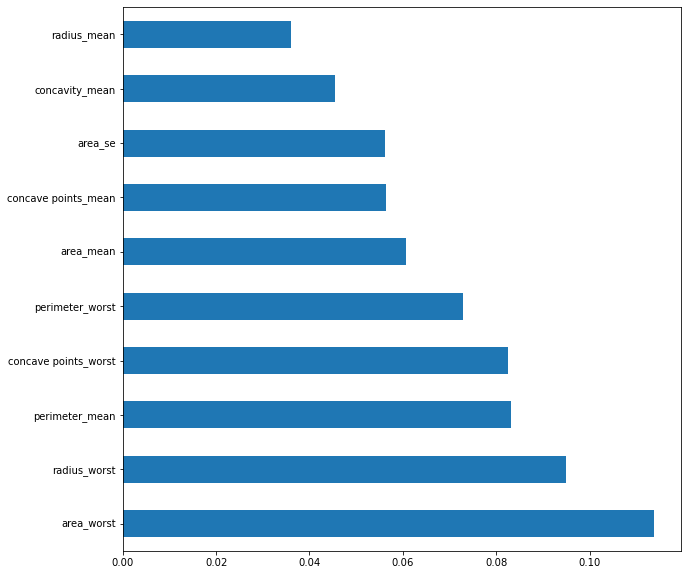

In [22]:
"""Feature Importance"""
model=ExtraTreesClassifier()
model.fit(x,y)

plt.figure(figsize=(10,10))
feature_rank=pd.Series(model.feature_importances_,index=x.columns)
feature_rank.nlargest(10).plot(kind='barh')

In [23]:
feature_rank=feature_rank.sort_values(ascending=False)
feature_rank

area_worst                 0.113816
radius_worst               0.094872
perimeter_mean             0.083250
concave points_worst       0.082523
perimeter_worst            0.072776
area_mean                  0.060731
concave points_mean        0.056287
area_se                    0.056281
concavity_mean             0.045431
radius_mean                0.036086
concavity_worst            0.033417
radius_se                  0.030417
perimeter_se               0.025813
smoothness_worst           0.024363
texture_worst              0.022480
compactness_worst          0.021052
texture_mean               0.019998
compactness_mean           0.016233
concavity_se               0.013204
fractal_dimension_worst    0.012749
smoothness_mean            0.010409
symmetry_worst             0.010255
compactness_se             0.008399
concave points_se          0.008178
symmetry_mean              0.007882
smoothness_se              0.007778
symmetry_se                0.007236
fractal_dimension_se       0

In [24]:
len(feature_rank.index[0:10])

10

In [25]:
x=df[feature_rank.index[0:10]]
x.head()

,area_worst,radius_worst,perimeter_mean,concave points_worst,perimeter_worst,area_mean,concave points_mean,area_se,concavity_mean,radius_mean
1,44.226689,4.999000,11.528226,0.431277,12.601587,36.414283,0.264896,8.606974,0.294788,4.535416
2,41.340053,4.854894,11.401754,0.492950,12.349089,34.684290,0.357631,9.696907,0.444297,4.437342
4,39.686270,4.747631,11.623253,0.403113,12.336936,36.013886,0.322955,9.718024,0.444972,4.504442
5,27.232334,3.933192,9.086804,0.417253,10.168579,21.842619,0.284412,5.214403,0.397240,3.528456
6,40.074930,4.783304,10.936178,0.439545,12.377399,32.249031,0.272029,7.342343,0.335708,4.272002


In [31]:
x.describe()

,area_worst,radius_worst,perimeter_mean,concave points_worst,perimeter_worst,area_mean,concave points_mean,area_se,concavity_mean,radius_mean
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,27.479165,3.936559,9.405652,0.313081,10.073741,24.237682,0.191444,5.310734,0.244785,3.696895
std,6.644523,0.461315,0.989416,0.085990,1.230117,4.997749,0.072180,1.736573,0.105726,0.369474
min,15.562776,2.993994,7.190967,0.093659,7.567034,14.209152,0.043035,2.608064,0.026306,2.862866
25%,22.872472,3.620083,8.723245,0.253130,9.199999,20.772576,0.139356,4.135819,0.166658,3.441657
50%,25.758494,3.843176,9.245539,0.303002,9.819369,23.214220,0.174040,4.782259,0.226936,3.634556
75%,30.396540,4.165332,9.921184,0.381117,10.714472,26.528264,0.243680,6.054747,0.316669,3.882010
max,47.244047,5.170106,12.016655,0.519711,13.364131,37.509999,0.395221,10.315038,0.564712,4.648656


In [30]:
print("\nInfo\n")
print(x.info())
print("\nMaximum\n")
print(x.max())
print("\nMinimum\n")
print(x.min())



Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 1 to 566
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_worst            451 non-null    float64
 1   radius_worst          451 non-null    float64
 2   perimeter_mean        451 non-null    float64
 3   concave points_worst  451 non-null    float64
 4   perimeter_worst       451 non-null    float64
 5   area_mean             451 non-null    float64
 6   concave points_mean   451 non-null    float64
 7   area_se               451 non-null    float64
 8   concavity_mean        451 non-null    float64
 9   radius_mean           451 non-null    float64
dtypes: float64(10)
memory usage: 38.8 KB
None

Maximum

area_worst              47.244047
radius_worst             5.170106
perimeter_mean          12.016655
concave points_worst     0.519711
perimeter_worst         13.364131
area_mean               37.509999
concave points_

### Finding best algorithum for this dataset

In [20]:
def all_classifier(x,y): 
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    clf=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(),
        DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier()]
    
    dict={}
    for i in clf:
        classifier=i
        score=cross_val_score(classifier,x,y,cv=10)
        dict[str(i)[:-2]]=score.mean()
        print(str(i)[:-2],"\nmean score:",score.mean(),'\n\n')

    return max(dict, key=dict.get),dict[max(dict, key=dict.get)]


In [21]:
best_algo=all_classifier(x,y)

LogisticRegression 
mean score: 0.9356521739130435 


KNeighborsClassifier 
mean score: 0.9267632850241545 


GaussianNB 
mean score: 0.9267632850241545 


SVC 
mean score: 0.9157487922705314 


AdaBoostClassifier 
mean score: 0.9179710144927536 


GradientBoostingClassifier 
mean score: 0.9357487922705314 


DecisionTreeClassifier 
mean score: 0.9046859903381643 


RandomForestClassifier 
mean score: 0.9379710144927536 


ExtraTreesClassifier 
mean score: 0.9534299516908213 




In [22]:
best_algo

('ExtraTreesClassifier', 0.9534299516908213)

## Spliting Dataset into train and test set

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Tunning the random forest
    Tuning the random forest with random search and then with grid search.
    I have combained both technique to achive more accuracy.

In [24]:
"""Randomized Search CV"""
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

#Number of features to consider at every split
max_features=['auto','sqrt','log2']

#maximum no of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]

#Minimum no of sample required to split a node
min_samples_split=[2,5,10,14]

#minmum no of sample required at each leaf node
min_samples_leaf=[1,2,4,6,8]

#Create random grid
random_grid={'n_estimators':n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "criterion":['entropy','gini']}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=100,
                               verbose=2,
                               random_state=100,
                               n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

rf_randomcv.best_params_
best=rf_randomcv.best_estimator_


y_pred=best.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

"""GridSearchCV"""
paran_grid={
           'criterion' : [rf_randomcv.best_params_['criterion']],
           "max_depth" : [rf_randomcv.best_params_['max_depth']],
           "max_features" : [rf_randomcv.best_params_['max_features']],
           
           "min_samples_leaf" : [rf_randomcv.best_params_['min_samples_leaf'],
                                 rf_randomcv.best_params_['min_samples_leaf']+2,
                                  rf_randomcv.best_params_['min_samples_leaf']+4],
                                  
           "min_samples_split" : [rf_randomcv.best_params_['min_samples_split']-2,
                                 rf_randomcv.best_params_['min_samples_split']+1,
                                  rf_randomcv.best_params_['min_samples_split'],
                                   rf_randomcv.best_params_['min_samples_split']+1,
                                    rf_randomcv.best_params_['min_samples_split']+2],
                                
            "n_estimators" : [rf_randomcv.best_params_['n_estimators'] - 200,
                              rf_randomcv.best_params_['n_estimators'] - 100,
                               rf_randomcv.best_params_['n_estimators'],
                                rf_randomcv.best_params_['n_estimators'] + 100,
                                 rf_randomcv.best_params_['n_estimators'] + 200]
            }

rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=paran_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
                                 
                                 
                                 
best_grid=grid_search.best_estimator_                                
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.0min finished


[[56  2]
 [ 2 31]]
0.9560439560439561
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        58
           M       0.94      0.94      0.94        33

    accuracy                           0.96        91
   macro avg       0.95      0.95      0.95        91
weighted avg       0.96      0.96      0.96        91

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 13.1min finished


[[56  2]
 [ 1 32]]
Accuracy Score 0.967032967032967
Classification report:               precision    recall  f1-score   support

           B       0.98      0.97      0.97        58
           M       0.94      0.97      0.96        33

    accuracy                           0.97        91
   macro avg       0.96      0.97      0.96        91
weighted avg       0.97      0.97      0.97        91



## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

## Saving the model

In [26]:
import pickle
pickle.dump(best_grid, open("Breast-Cancer.sav", 'wb'))

## Loading the model

In [27]:
import joblib
loaded_model = joblib.load("Breast-Cancer.sav")

## Costume Input

In [31]:
x.columns

Index(['radius_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'area_se', 'perimeter_worst', 'area_mean',
       'perimeter_mean', 'radius_mean', 'concavity_worst'],
      dtype='object')

In [8]:
import pandas as pd
df=pd.read_csv("Breast-Cancer-Dataset.csv",usecols=['radius_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'area_se', 'perimeter_worst', 'area_mean',
       'perimeter_mean', 'radius_mean', 'concavity_worst'])
df.tail(2)
df=df.describe()

In [10]:
df.to_csv('breast.csv')

In [36]:
X1=[df.iloc[568].values]
X1

[array([  7.76 ,  47.92 , 181.   ,   0.   ,  19.15 ,   9.456,  59.16 ,
        268.6  ,   0.   ,   0.   ])]

In [37]:
print("X1 prediction is: ",loaded_model.predict(X1))

X1 prediction is:  ['M']


### Required Features for this model are
-    radius_worst
-   area_worst
-   concave points_worst
-    concave points_mean
-    area_se
-    perimeter_worst
-    area_mean
-    perimeter_mean
-    radius_mean
-    concavity_worst